<a href="https://www.kaggle.com/code/hattoriyoung/linearregressionfromscratch?scriptVersionId=199952753" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### **Linear Regression From Scratch**

#### **Introduction**

Linear regression is a statistical method used to model the relationship between one or more independent variables (features) and a dependent variable (outcome). The goal is to predict the value of the dependent variable based on the values of the independent variables.

The model is expressed as $y_i = \beta_0 + \beta_1x_{i1} + ... + \beta_px_{ip} + \epsilon_i$

The matrix nation is as follows: $Y = X \beta + \epsilon$

- $Y = [y_1,y_2,...,y_n]$, 
- $X = [x_1^T,x_2^T...,x_n^T]$,
- $\beta = [\beta_0,\beta_1,...,\beta_p]$,
- $\epsilon = [\epsilon_1,\epsilon_2,...,\epsilon_n]$

#### **Assumptions**
- **Linearity**: Predictor variable(s) and the dependent variable should follow a linear relationship. You can observe this by plotting a simple scatterplot. 
- **Homoscedasticity**: The variance error of the outcome variable respect to the predictor variables should be similar. In other words, the error of the outcome variable should not depend on the predictor variable. You can observe this by plotting a scatterplot of resisduals vs predicted values. 
- **Multicolinearity**: The predictors should not have any correlation amongst each other. The regression model finds it difficult to determine the individual effect of each predictor on the dependent variable. Since the predictors are highly correlated, it becomes challenging for the model to distinguish which variable is responsible for changes in the outcome.This can be measured using variance inflation factor (VIF) where values above > 10 are considered problematic. 
- **Normality**: The resisduals should follow a normal distribution. You can observe this by doing a histogram or QQplots of the residuals. 

#### **Goal**

The Goal of this excerise is to implement the model from scratch without using `lm()` function. You would use basic linear algebra concepts like transpose, matrix multiplication, vectors, etc to complete this excerise.

#### **Motivation**

As for the motivation, these kind of excerises are good for any data science interview preperation as you are able to get the fundementals down. Understand the coeffecients, theory, and math/statistics behind LM.

#### **R Code Implementation**

In [1]:
# import libraries
library(readr)
library(dplyr) # data manipulations
library(scatterplot3d) # graphics

fitness = read_csv("/kaggle/input/data-to-learn-data-science/data.csv")


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 169 Columns: 4


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Duration, Pulse, Maxpulse, Calories



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Let's do our EDA. 

First, see how our scatterplot looks with just these 3 variables as a potential for multiple regression.....

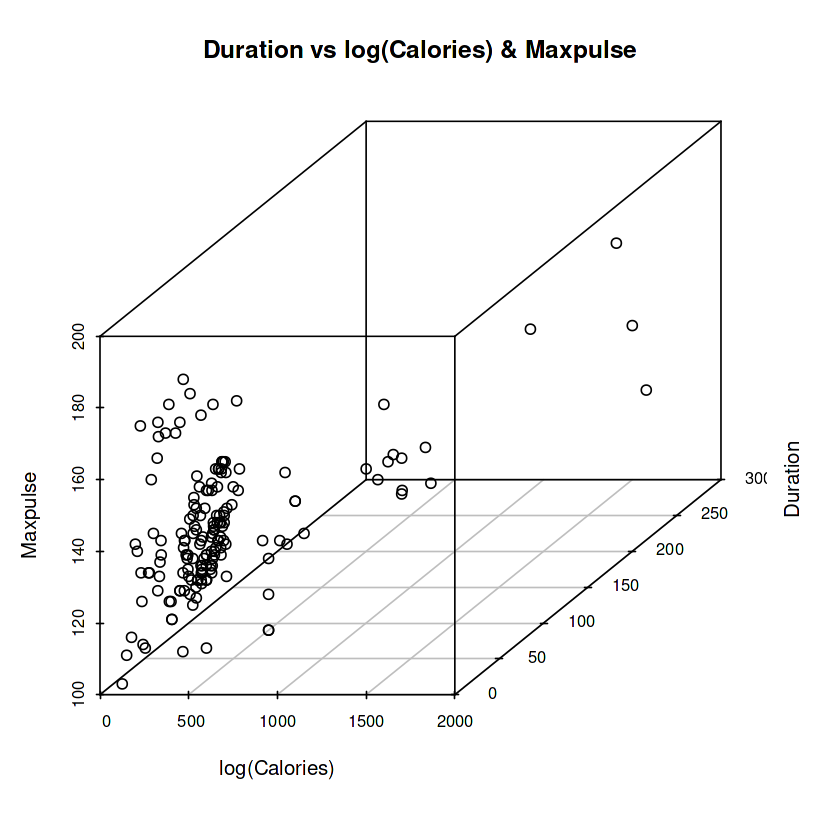

In [2]:
plot3d = scatterplot3d(x = fitness$Calories, y = fitness$Duration,z = fitness$Maxpulse, angle = 45, main = "Duration vs log(Calories) & Maxpulse",xlab = "log(Calories)", ylab = "Duration", zlab = "Maxpulse")

#### **Understanding: `Calories`**

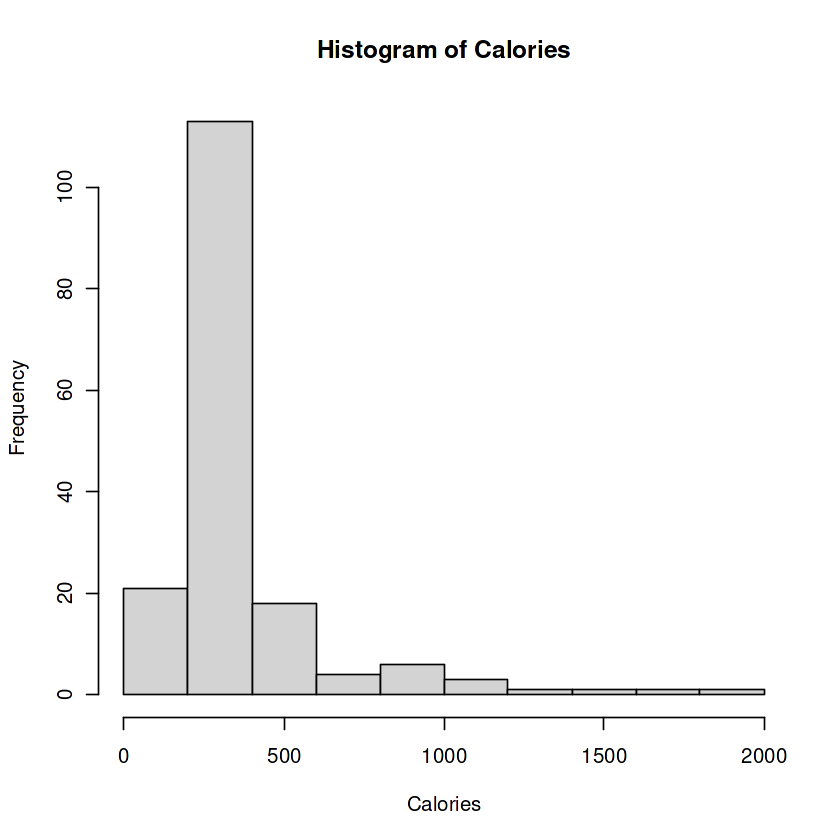

In [3]:
fitness$Calories = ifelse(is.na(fitness$Calories) == T, median(fitness$Calories, na.rm = T), fitness$Calories) #impute na for median because skewed
hist(fitness$Calories, main = "Histogram of Calories", xlab = "Calories") # Skewed, let's try to do a transformation, so we limit outliers

At first, we have encountered several missing values from the `Calories` variable, therefore, we would need to impute the NA values using the median `Calories`. We use median because we can observe that the variable is skewed based on the histogram. This brings me to the next point of skewness. We can see most runners burn between 0 - 500 calories, just for reducing skewness we will be taking the log transformation.

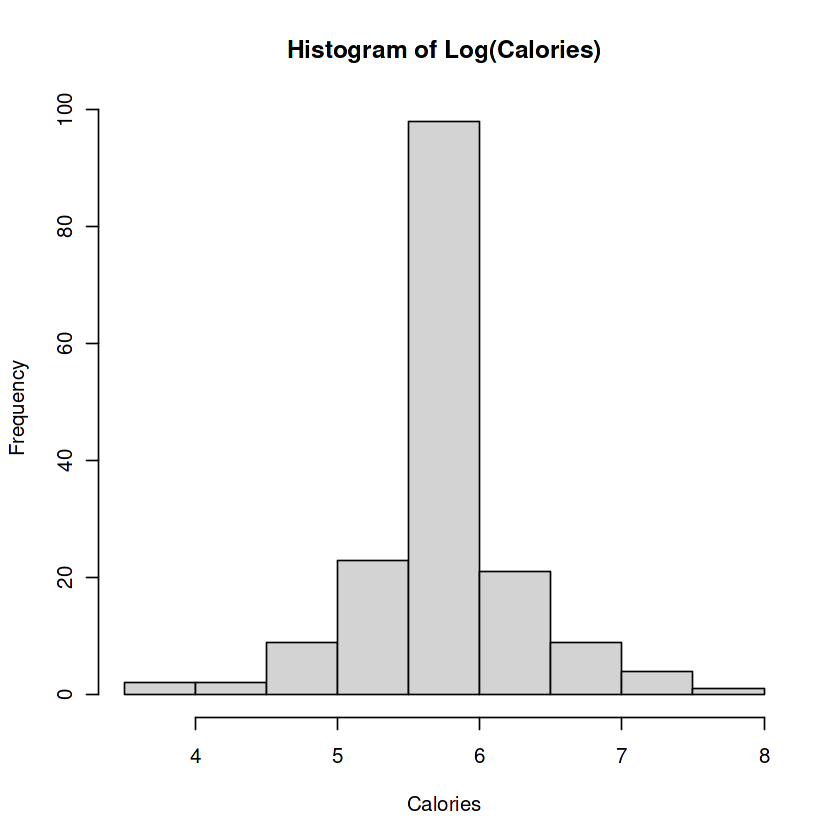

In [4]:
fitness$Calories = log(fitness$Calories) # OLS is invariant -> so good to log transform to keep meaning
hist(fitness$Calories, main = "Histogram of Log(Calories)", xlab = "Calories") 

After doing log transformation, the skewness has been taken away and the variable takes a normal distribution, or at least something very similar to the normal distribution

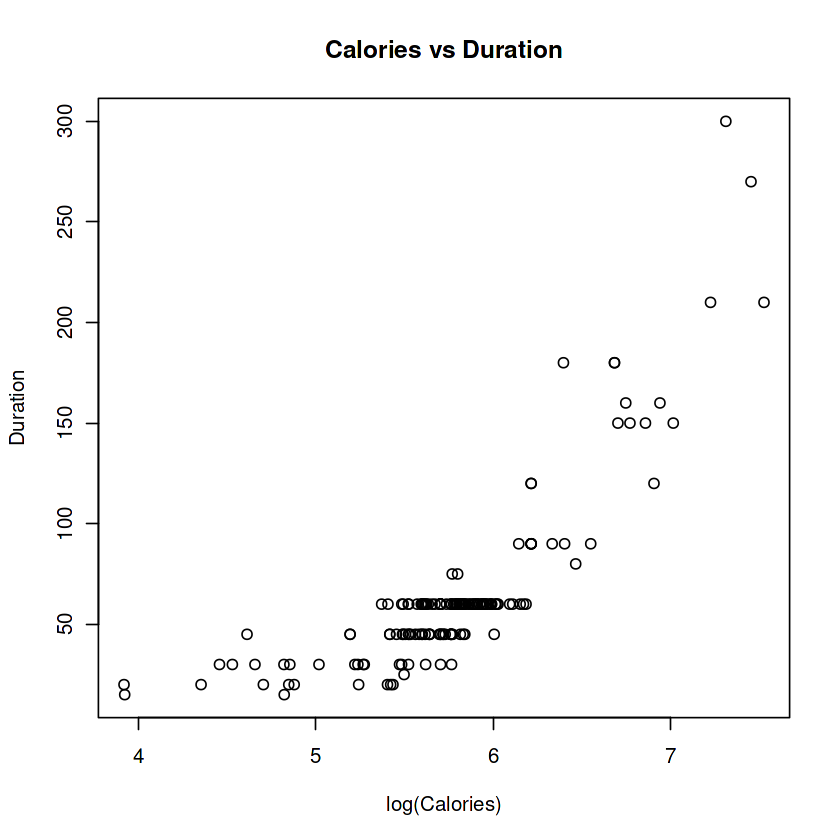

In [5]:
plot(fitness$Duration ~ fitness$Calories, main = "Calories vs Duration",xlab = "log(Calories)", ylab = "Duration")

The scatterplot looks somewhat linear, however, there are noticeable outliers despite our log transformations, but we will keep `Calories` in and evaluate the variable after creating our lm model.

#### **Understanding: Correlation**

This is an important step for flagging any variables that have multicolinearity. Let's plot a correlation matrix and see if there are any noticeable variables. We could do a VIF test, but correlation matrix are much more simple alternative.

In [6]:
cor(fitness[,-1]) #Maxpulse -> pulse are correlated. That makes sense. Avoid Multicolinearity, use Maxpulse only
fitness = fitness %>% select(-c(Pulse))

,Pulse,Maxpulse,Calories
Pulse,1.00000000,0.7865347,0.08950159
Maxpulse,0.78653468,1.0000000,0.24603606
Calories,0.08950159,0.2460361,1.00000000


We can observe `Pulse` and `Maxpulse` having a strong correlation with each other (r = 0.8). This is essentially redundant information. It makes sense as to why there are correlation between those 2 variables, so we will remove the `Pulse` variable moving forward.

#### **Understanding: `Maxpulse`**

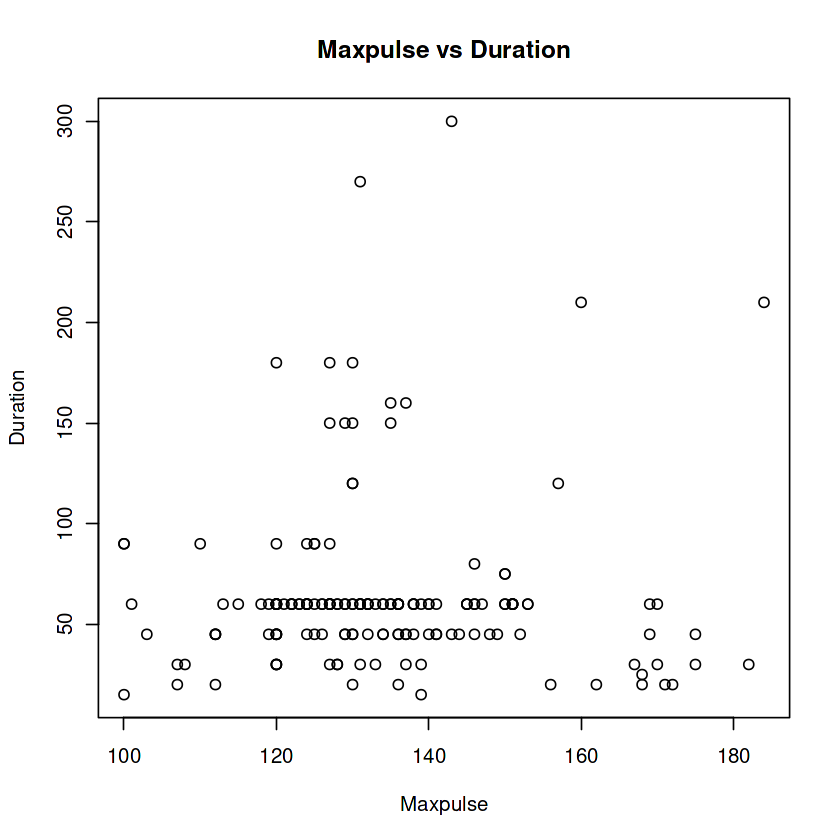

In [7]:
plot(fitness$Duration ~ fitness$Maxpulse,main = "Maxpulse vs Duration",xlab = "Maxpulse",ylab = "Duration")

The following variable does not meet the linearity assumption. As a result, we could try to solve this by several methods such as applying a nonlinear model, log, sqrt, or polynomial transformations. However, for our excerise, we will just remove the variable.

In [8]:
fitness = fitness %>% select(-c(Maxpulse))

#### **Model Building: Linear Regression**

In [9]:
Y = as.matrix(fitness$Duration) # Y = 169 x 1
X = as.matrix(fitness[,-1]) # X = 169 x 1
X = cbind(intercept = rep(1, nrow(fitness)),X) #add intercept column 169 x 2
N = nrow(fitness)

In [10]:
print(Y[1:10,]) # first 10 entries of the outcome vector
print(X[1:10,]) # first 10 entries of the predictor matrix

 [1] 60 60 60 45 45 60 60 45 30 60


      intercept Calories
 [1,]         1 6.013960
 [2,]         1 6.171701
 [3,]         1 5.828946
 [4,]         1 5.643325
 [5,]         1 6.006353
 [6,]         1 5.703782
 [7,]         1 5.924256
 [8,]         1 5.534575
 [9,]         1 5.273512
[10,]         1 5.594711


**Gauss Markov Theorem**

In simple terms, Gauss Markov theorem states, under certain conditions, that the **ordinary least squares (OLS)** estimator of the coeffecients in Linear regression is BLUE (Best, Linear, Unbiased Estimator).

The BLUE proof is fairly simple and can be found [online](https://www.unm.edu/~jikaczmarski/working_papers/gm_proof.pdf), here I will attach the proof from UNM

**Unbiased**: 
- $E[\hat{\beta}] = \beta$ with the assumption $E(\epsilon_i | x_i) = 0$, which we are essentailly looking for is as we take $\hat{\beta}$ asymptotically, $\hat{\beta}$ will equal to $\beta$

**Linear**:
- To prove "linear", the process has already been done in the unbiased step, which we derive it in the form of $\hat{\beta} = (X'X)^{-1}X'y$

**Best**:
- The hardest part of the proof, we are trying to prove that $var(\hat{\beta}) \le var(\beta)$. 

In [11]:
# Gauss Markov Theorem
B = solve(t(X) %*% X) %*% t(X) %*% Y # (X^T X)^-1 * X^T * Y
Y_pred = X %*% B # Calculate Y predicted
print(Y_pred[1:10])

 [1] 79.44269 89.30823 67.87143 56.26220 78.96697 60.04340 73.83238 49.46069
 [9] 33.13317 53.22181


In [12]:
MSE = sum((Y - Y_pred)^2) * (1/N) # Calculate MSE
print(MSE)

[1] 600.6292


In [13]:
# Compare lm() built in function
model = lm(fitness$Duration ~ fitness$Calories)
paste("intercept",model$coeff[[1]])
paste("Calories",model$coeff[[2]])

[1] "intercept -296.686168549004"

[1] "Calories 62.5426319228132"

In [14]:
print(B)

                [,1]
intercept -296.68617
Calories    62.54263


We can compare and see that both coeffecients from the built in function and the estimator coeffecient that was calculated by "hand" are similar/same. 

And finally, let's see if our residuals meet the requirements of the linear regression

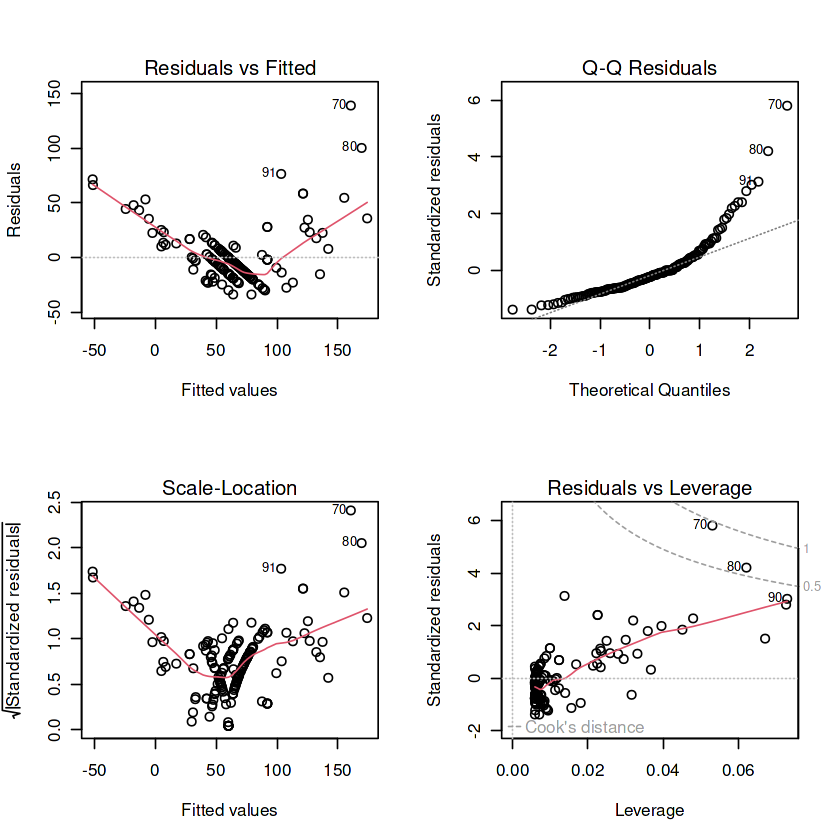

In [15]:
par(mfrow = c(2,2))
plot(model)

Based on our result above, we can make the following conclusions:

1. We can see that we have several outliers skewing the overal data points. The qqplot and the cook's distance both outline points [70,80,90] as outliers. Despite the log transformation, our residuals of normality assumption is still violated
2. We can see that the homogenity of variance is also violated. Ideally, the points should scatter around the 0 horizontal line in a random manner with no pattern, indicating that as our independent variable (calories) take on different values within the x axis, our residuals variance won't depend on the value of the calories.

In conclusion, even though we did a great excerise of creating linear model and its estimators & coeffecients from scratch, for this specific fitness dataset, the linear regression model does not apply. The solution to this is either we use nonlinear models, such as polynomial models, or the outcome variable would need to go through transformations to meet the lm assumptions.